# 2019 Fire Data in United States

## How do ecosystems respond after wildfires?
This is important because, as climate change continues, we experiecne more severe and intense wildfires and it is important to know how ecosystems change and respond to these more severe wildfires.
<br>
This is relevant to many people who work in natural resources such as land managers, foresters, wildlife biologists, etc.
<br>
The completion of this task will result in maps to visulize how an ecosystem changes each year after a wildfire.

### Objectives
- Visulize 2019 wildfire and prescribed fire data in the United States 
<br>
    - Where was the biggest wildfire/prescribed burn in 2019? 
<br>
    - What was the largest wildfire/prescribed burn in Idaho in 2019?
<br>
    - Does the east or west do more prescrirbed burns?
<br>
- Observe how NDVI values have changed before and after the Sheep Creek wildfire that happened in Idaho
<br>
- Look at vegetation cover before and after the Sheep Creek wildfire

## Data

#### Fire Data
 - Data for this project was downloaded from: https://www.mtbs.gov/direct-download (Monitoring Trends in Burn Severity)
<br>
- The specific data that was downloaded was under the tab burn severity mosaics, Continental US, for the year 2019
<br>
- Fire data usually has a lag of 1-2 years until it is available, which is why 2019 was chosen
<br>
- Data from this website is only recorded for wildfires that are 1,000 acres or greater in the western United States and 500 acres or greater in the eastern Unites States.
<br>
- I have previously used this website for other courses

#### Satelitte Imagery
- Satellite Imagery was pulled from google earth engine from: https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_L2
- Landsat 8

#### Vegetation Cover
- The Rangeland Analysis Platform’s vegetation biomass product provides annual aboveground biomass from 1986 to present of: annual forbs and grasses, perennial forbs and grasses, and herbaceous (combination of annual and perennial forbs and grasses).
- Methods of this tool can be seen at https://rangelands.app/products/#cover 
- Bands are: Band 1 - annual forb and grass Band 2 - bare ground Band 3 - litter Band 4 - perennial forb and grass Band 5 - shrub Band 6 - tree Band 7 - annual forb and grass uncertainty Band 8 - bare ground uncertainty Band 9 - litter uncertainty Band 10 - perennial forb and grass uncertainty Band 11 - shrub uncertainty Band 12 - tree uncertainty
- Data are in WGS84 Geographic Coordinate System (EPSG:4326)
- Spatial resolution is approximately 30m
 

## Workflow
 - Visulaize wildfire and prescribed fires in the US to answer basic questions and get background information
     - Plot using foilum
 - Extract NDVI values from an area of interest before and after wildfire occurance
     - Pull Landsat imagery 
     - Function to .getNDVI() values from imagery
     - Plot using folium
 - Display histograms of NDVI values to show change each year
     - Use ee.Reducer.fixedHistogram()
     - Plot using matplotlib
 - Change in vegetation cover each year
     - Rangeland analysis vegetation cover tool
     - Filter for specific year and band
     - Use ee.Reducer.mean
     - Plot using folium

Additional resources:
<br>
https://jcutrer.com/python/learn-geopandas-plotting-usmaps 
<br>
https://towardsdatascience.com/creating-an-interactive-map-of-wildfire-data-using-folium-in-python-7d6373b6334a
<br>
https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/cold-springs-wildfire/wildfire-remote-sensing/
<br>
https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/

In [3]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import branca.colormap as cm

In [4]:
import ee
ee.Initialize()

In [5]:
pwd

'C:\\Users\\12087\\geopandas-tutorial'

In [41]:
fire_data_all = geopandas.read_file('other/mtbs_fod_pts_data/mtbs_FODpoints_DD.shp')
states = geopandas.read_file('../OneDrive - University of Idaho/Documents/ArcGIS/usa.shp')
sheepFireData = geopandas.read_file('data/mtbs/2019/id4371511252320190722/id4371511252320190722_20190719_20190804_burn_bndy.shp')

### Visulize 2019 Wildfire and Prescribed Fire Data in the United States

##### Wildfires

In [7]:
#converting to crs that causes less distortion to US
fire_data_all = fire_data_all.to_crs("EPSG:3395")
states = states.to_crs("EPSG:3395")

In [8]:
#Pull out all wildfire data
wildfire_index = fire_data_all['Incid_Type'] == 'Wildfire'
wildfire = fire_data_all.loc[wildfire_index]
# wildfire

In [9]:
#Pull out all 2019 wildfire data
wild19_index = wildfire['Ig_Date'] >= '2019'
wildfire_19 = wildfire.loc[wild19_index]
# wildfire_19

In 2019, there were 380 (recorded) fires that ignited in the United States (only accounts for wildfires > 1,000 ac in the west and > 500 ac in the east)

In [10]:
# Pull out all Idaho 2019 wildfires
state_wildfire = wildfire_19.sort_values(by = 'Event_ID', ascending = True)
idaho_wildfire = state_wildfire[202:223]

In [11]:
#Pull out largest 2019 Idaho wildfire
wildfire_19_sort = wildfire_19.sort_values(by = 'BurnBndAc', ascending = False)
wildfire_19_biggest = wildfire_19_sort[:1]
# wildfire_19_biggest

 The largest wildfire happened in Alaska on July 9th and burned about 470,500 acres


In [12]:
# sheepFireData

The largest wildfire in Idaho was called the Sheep Creek fire that burned about 107,000 acres

In [13]:
# wildfire_19

In [14]:
total_ac_wildfire = wildfire_19['BurnBndAc'].sum()
print('In 2019,', total_ac_wildfire, 'acres were lost to wildfires') #almost 4.2 million acres

In 2019, 4190754 acres were lost to wildfires


##### Prescribed Burning

In [15]:
# Pull out 2019 Rx burning
rx_burn_index = fire_data_all['Incid_Type'] == 'Prescribed Fire'
rx_burn = fire_data_all.loc[rx_burn_index]
# rx_burn

rx_index = rx_burn['Ig_Date'] >= '2019'
rx_burn_19 = rx_burn.loc[rx_index]
# rx_burn_19

In 2019, there were 420 (recorded) prescribed burns in the United States

In [16]:
#Pull out largest 2019 Rx burn
rx_19_sort = rx_burn_19.sort_values(by = 'BurnBndAc', ascending = False)

rx_19_biggest = rx_19_sort[:1]
# rx_19_biggest

The largest prescribed burn happened in Florida on March 22 and burned about 17,000 acres

In [17]:
rx_burn_19_all = rx_burn_19['Event_ID'] == 'ID4248911688820190828'
rx_idaho = rx_burn_19.loc[rx_burn_19_all]
# rx_idaho

The largest prescribed fire in Idaho was called Trout Springs Broadcast that burned about 12,000 acres on August 28

In [18]:
total_ac_rx = rx_burn_19['BurnBndAc'].sum()
print('In 2019,', total_ac_rx, 'acres were broadcast burned') #about 800,000 acres

In 2019, 820313 acres were broadcast burned


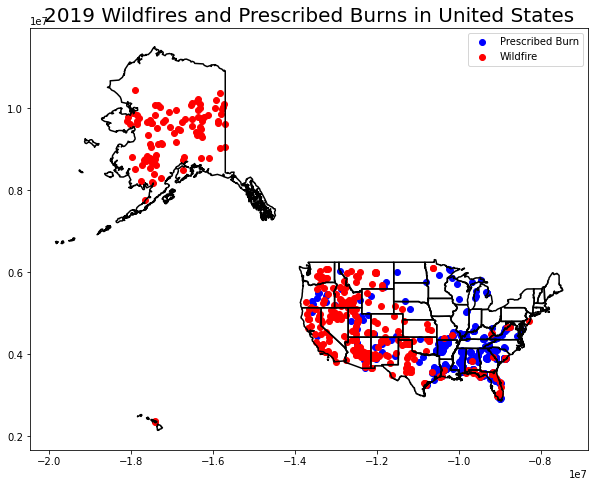

In [19]:
#Plot wildfires and Rx burning
ax = us_boundary_map = states.boundary.plot(figsize=(10, 14), color = 'black') #Plot the boudary of US states in black
rx_burn_19.plot (ax=ax, color = 'blue', label = 'Prescribed Burn') #Plot Rx burning to same plot in blue
wildfire_19.plot (ax=us_boundary_map, color = 'red', label = 'Wildfire') #Plot wildfires to same plot in red
plt.title("2019 Wildfires and Prescribed Burns in United States", fontsize = 20) #add title
ax.legend() #add legend

The East of the US does more prescribed burning that the west US
<br>
West US also gets more  large (>1,000 ac) wildfires than the East

In [20]:
#Create an interactive folium map of 2019 wildfire data
#Create folim map
m = folium.Map(location = [40.44, -104.81],
               tiles = 'StamenTerrain',
               zoom_start = 4)

#Create folium feature groups for wildfires and Rx burning
small_wildfires = folium.FeatureGroup(name = '< 10,000 Acres (w)')
medium_wildfires = folium.FeatureGroup(name = '10,000 - 50,000 Acres (w)')
large_wildfires = folium.FeatureGroup(name = '50,000 - 100,000 Acres (w)')
xl_wildfires = folium.FeatureGroup(name = '> 100,000 Acres (w)')

small_rx = folium.FeatureGroup(name = '< 10,000 Acres (Rx)')
medium_rx = folium.FeatureGroup(name = '10,000 - 50,000 Acres (Rx)')


#For loop to iterate through the 2019 wildfire dataset and separete into categories
for i, v in wildfire_19.iterrows():
    
    fire_size = float(v['BurnBndAc'])
    
    popup = """
    Type : <b>%s</b><br>
    Fire Name : <b>%s</b><br>
    Size (Acres) : <b>%s</b><br>
    State : <b>%s</b><br>
    Date : <b>%s</b><br>
    """ % (v['Incid_Type'],v['Incid_Name'], v['BurnBndAc'], 
           v['Event_ID'], v['Ig_Date'])
    
    
    if fire_size < 10000:
        folium.CircleMarker(location = [v['BurnBndLat'], 
                                        v['BurnBndLon']],
                           radius = np.log(fire_size) * 0.8,
                           weight = 0,
                           tooltip = popup,
                           color = '#ffeda0',
                           fill_color = '#ffeda0',
                           fill_opacity = 0.7,
                           fill = True).add_to(small_wildfires)
        
    if fire_size in range(10000, 50000):
        folium.CircleMarker(location = [v['BurnBndLat'], 
                                        v['BurnBndLon']],
                           radius = np.log(fire_size),
                           weight = 0,
                           tooltip = popup,
                           color = '#feb24c',
                           fill_color = '#feb24c',
                           fill_opacity = 0.7,
                           fill = True).add_to(medium_wildfires)
    
    if fire_size in range(50000, 100000):
        folium.CircleMarker(location = [v['BurnBndLat'], 
                                        v['BurnBndLon']],
                           radius = np.log(fire_size) * 1.5,
                           weight = 0,
                           tooltip = popup,
                           color = '#fc4e2a',
                           fill_color = '#fc4e2a',
                           fill_opacity = 0.7,
                           fill = True).add_to(large_wildfires)

    if fire_size > 100000:
        folium.CircleMarker(location = [v['BurnBndLat'], 
                                        v['BurnBndLon']],
                           radius = np.log(fire_size) * 2,
                           weight = 0,
                           tooltip = popup,
                           color = '##b10026',
                           fill_color = '#b10026',
                           fill_opacity = 0.7,
                           fill = True).add_to(xl_wildfires)

#For loop to iterate through the 2019 Rx dataset and separete into categories
for i, v in rx_burn_19.iterrows():
    
    fire_size = float(v['BurnBndAc'])
    
    popup = """
    Type : <b>%s</b><br>
    Fire Name : <b>%s</b><br>
    Size (Acres) : <b>%s</b><br>
    State : <b>%s</b><br>
    Date : <b>%s</b><br>
    """ % (v['Incid_Type'],v['Incid_Name'], v['BurnBndAc'], 
           v['Event_ID'], v['Ig_Date'])
    
    if fire_size < 10000:
        folium.CircleMarker(location = [v['BurnBndLat'], 
                                        v['BurnBndLon']],
                           radius = np.log(fire_size) * 0.8,
                           weight = 0,
                           tooltip = popup,
                           color = '#bdd7e7',
                           fill_color = '#bdd7e7',
                           fill_opacity = 0.7,
                           fill = True).add_to(small_rx)
        
    if fire_size in range(10000, 50000):
        folium.CircleMarker(location = [v['BurnBndLat'], 
                                        v['BurnBndLon']],
                           radius = np.log(fire_size),
                           weight = 0,
                           tooltip = popup,
                           color = '#6baed6',
                           fill_color = '#6baed6',
                           fill_opacity = 0.7,
                           fill = True).add_to(medium_rx)

#Add layers to folium map
small_wildfires.add_to(m)
medium_wildfires.add_to(m)
large_wildfires.add_to(m)
xl_wildfires.add_to(m)

small_rx.add_to(m)
medium_rx.add_to(m)

#Add layer contorl to folium map
folium.LayerControl(collapsed = False).add_to(m)

#Display map
m

### NDVI Values Before and After the Sheep Creek Wildfire

In [21]:
#Write a function that calculated NDVI from an image using NIR and R bands
def getNDVI(image):
    return image.normalizedDifference(['SR_B5', 'SR_B4'])

#Pull in Landsat imagery from July 2018, July and August 2019, July 2020, and July 2021
image1 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_039030_20180716')
image2 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_039030_20190719')
image2a = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_039030_20190804')
image3 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_039030_20200705')
image4 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_039030_20210708')

#Compute NDVI from images
ndvi1 = getNDVI(image1)
ndvi2 = getNDVI(image2)
ndvi2a = getNDVI(image2a)
ndvi3 = getNDVI(image3)
ndvi4 = getNDVI(image4)

#Define color palette
ndviParams = {'palette': ['#d53e4f', '#f46d43', '#fdae61', '#762a83', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']}

In [22]:
#Create an area of interest around the perimeter of the Sheep Creek wildfire
coords = [[-113.020252, 43.718120], [-112.493891, 43.785828], [-112.430181, 43.542867], [-112.962372, 43.476131], [-113.020252, 43.718120]]
aoi = ee.Geometry.Polygon(coords)

In [23]:
#Clip NDVI images to area of interest
clip1 = ndvi1.clip(aoi) #2018
clip2 = ndvi2.clip(aoi) #July 2019
clip2a = ndvi2a.clip(aoi) #August 2019
clip3 = ndvi3.clip(aoi) #2020
clip4 = ndvi4.clip(aoi) #2021

In [43]:
#Create a folium map showing NDVI images 
#Create function to add EE images
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)
    
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Create a folium map object.
my_map = folium.Map(location=[43.5, -112.5], zoom_start = 10)

#Add the layer to the map object
my_map.add_ee_layer(clip1, ndviParams, '2018 NDVI')
my_map.add_ee_layer(clip2, ndviParams, '2019a NDVI')
my_map.add_ee_layer(clip2a, ndviParams, '2019b NDVI')
my_map.add_ee_layer(clip3, ndviParams, '2020 NDVI')
my_map.add_ee_layer(clip4, ndviParams, '2021 NDVI')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

#Add a step color legend
step = cm.StepColormap(['#d53e4f', '#f46d43', '#fdae61', '#762a83', '#e6f598', '#abdda4', '#66c2a5', '#3288bd'], vmin = -1, vmax = 1, caption = 'NDVI Values')
my_map.add_child(step)

# Display the map.
display(my_map)

### Display Histograms of NDVI Values for July 2019, August 2019, 2020, and 2021

In [25]:
#Use a variable using histogram reducer
hist_reducer = ee.Reducer.fixedHistogram(-.05, .2, 40)
scale = 30

In [26]:
#Use histogram reducer on clipped NDVI iamges
#Plot 1 (July 2019 (Pre))
hist_data_ee2 = clip2.reduceRegion(hist_reducer, aoi, scale) #Using histogram reducer
hist_data2 = hist_data_ee2.getInfo() #Pulling out NDVI values
hist_np2 = np.array(hist_data2['nd']) #Convert to numpy array 
bins2 = hist_np2[:, 0] #Assign NDVI values to a variable
counts2 = hist_np2[:, 1] #Assign the count of each NDVI value to a variable

#Plot 2 (August 2019 (Post))
hist_data_ee2a = clip2a.reduceRegion(hist_reducer, aoi, scale)
hist_data2a = hist_data_ee2a.getInfo()
hist_np2a = np.array(hist_data2a['nd'])
bins2a = hist_np2a[:, 0]
counts2a = hist_np2a[:, 1]

#Plot 3 (2020)
hist_data_ee3 = clip3.reduceRegion(hist_reducer, aoi, scale)
hist_data3 = hist_data_ee3.getInfo()
hist_np3 = np.array(hist_data3['nd'])
bins3 = hist_np3[:, 0]
counts3 = hist_np3[:, 1]

#Plot 4 (2021)
hist_data_ee4 = clip4.reduceRegion(hist_reducer, aoi, scale)
hist_data4 = hist_data_ee4.getInfo()
hist_np4 = np.array(hist_data4['nd'])
bins4 = hist_np4[:, 0]
counts4 = hist_np4[:, 1]

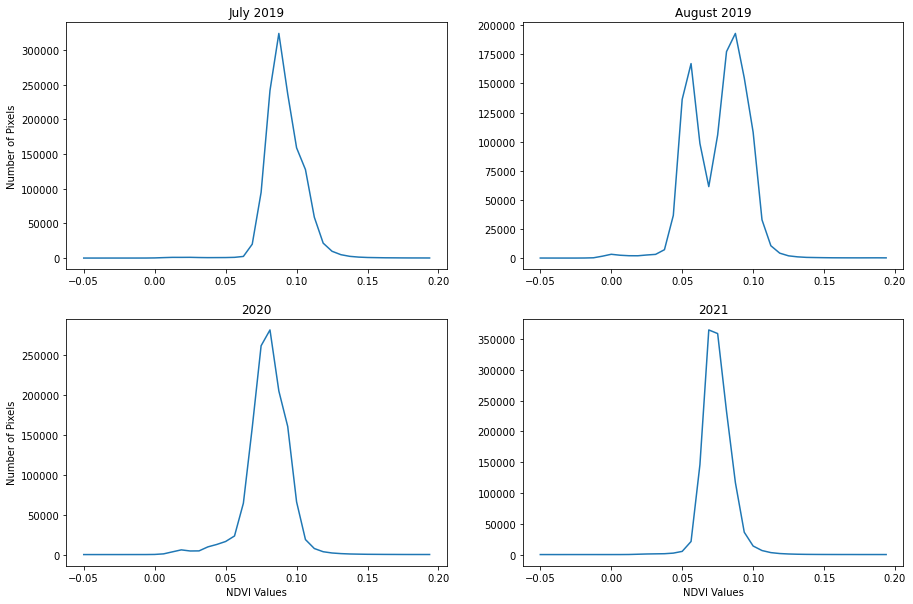

In [27]:
#Plot all four histograms of NDVI values in one figure
figure, axis = plt.subplots(2, 2, figsize=(15,10)) #Creating a figure with four subplots
  
# July 2019
axis[0,0].plot(bins2, counts2) #Plot bins on x axis and number of pixels on y axis
axis[0, 0].set_title("July 2019") #Add title
axis[0,0].set_ylabel('Number of Pixels') #Add y axis label
  
# August 2019
axis[0, 1].plot(bins2a, counts2a)
axis[0, 1].set_title("August 2019")
  
# 2020
axis[1, 0].plot(bins3, counts3)
axis[1, 0].set_title("2020")
axis[1,0].set_xlabel('NDVI Values')
axis[1,0].set_ylabel('Number of Pixels')
  
# 2021
axis[1, 1].plot(bins4, counts4)
axis[1, 1].set_title("2021")
axis[1,1].set_xlabel('NDVI Values')
  
# Combine all the operations and display
plt.show()

One thing to note with the histograms is that NDVI values are being calculated for the whole rectangle that was drawn around the fire perimeter and is not just the fire perimeter. Averages are not completely accruate because of this

# Vegetation  Cover

In [28]:
#Bring in an image collection of plant cover
cover =  ee.ImageCollection("projects/rangeland-analysis-platform/vegetation-cover-v2")

This image collection has several bands of functional vegetation types:
- Band 1 - Annual forb and grass
- Band 2 - bare ground
- Band 3 - litter
- Band 4 - perennial forb and grass 
- Band 5 - shrub 
- Band 6 - tree

I only worked with bands 1, 4, and 5 for years 2018, 2019, 2020

In [29]:
#Pull specific bands and years from image collection
annual_cover2018 = cover.filterDate('2018').select('AFGC') #Select all 2018 data for 'AFGC' band (Annual forbs and grass cover)
annual_cover2019 = cover.filterDate('2019').select('AFGC')
annual_cover2020 = cover.filterDate('2020').select('AFGC') 
 
perennial_cover2018 = cover.filterDate('2018').select('PFGC') #Select all 2018 data for 'PFGC' band (Perennial forbs and grass cover)
perennial_cover2019 = cover.filterDate('2019').select('PFGC')
perennial_cover2020 = cover.filterDate('2020').select('PFGC')

shrub2018 = cover.filterDate('2018').select('SHR') #Select all 2018 data for 'AFGC' band (Annual forbs and grass cover)
shrub2019 = cover.filterDate('2019').select('SHR')
shrub2020 = cover.filterDate('2020').select('SHR')

In [30]:
#Reduce the EE image collections to an EE image with Reducer.mean() then clip to area of interest
#Annual forbs and grass cover
annual_cover2018 = annual_cover2018.reduce(ee.Reducer.mean()) #Reduce annual forbs and grass cover to ee image using Reduer.mean
annual_cover2018 = annual_cover2018.clip(aoi) #Clip image to area of interest (.clip function only accepts ee.images)
annual_cover2019 = annual_cover2019.reduce(ee.Reducer.mean())
annual_cover2019 = annual_cover2019.clip(aoi)
annual_cover2020 = annual_cover2020.reduce(ee.Reducer.mean())
annual_cover2020 = annual_cover2020.clip(aoi)

#Perennial forbs and grass cover
perennial_cover2018 = perennial_cover2018.reduce(ee.Reducer.mean())
perennial_cover2018 = perennial_cover2018.clip(aoi)
perennial_cover2019 = perennial_cover2019.reduce(ee.Reducer.mean())
perennial_cover2019 = perennial_cover2019.clip(aoi)
perennial_cover2020 = perennial_cover2020.reduce(ee.Reducer.mean())
perennial_cover2020 = perennial_cover2020.clip(aoi)

#Shrub cover
shrub2018 = shrub2018.reduce(ee.Reducer.mean())
shrub2018 = shrub2018.clip(aoi)
shrub2019 = shrub2019.reduce(ee.Reducer.mean())
shrub2019 = shrub2019.clip(aoi)
shrub2020 = shrub2020.reduce(ee.Reducer.mean())
shrub2020 = shrub2020.clip(aoi)

In [31]:
#Define color palettes: https://colorbrewer2.org/#type=sequential&scheme=Blues&n=4
colorpalette1 = { 'palette': ["#005824", "#238b45", "#41ae76", "#66c2a4", "#99d8c9", "#ccece6", "#edf8fb"]} #greens dark to light
colorpalette2 = { 'palette': ["#084594", "#2171b5", "#4292c6", "#6baed6", "#9ecae1","#c6dbef", "#eff3ff"]} #blues dark to light
# colorpalette3 = { 'palette': ["#f7f7f7", "#d9d9d9", "#bdbdbd", "#969696", "#737373", "#525252", "#252525"]} #blacks
colorpalette4 = { 'palette': ["#4a1486", "#6a51a3", "#807dba", "#9e9ac8", "#bcbddc", "#dadaeb", "#f2f0f7"]} #purples dark to light

In [42]:
#Create a folium map showing the vegetatation cover for AFGC, PFGC, Shrubs
#Define a function to add layer
def add_ee_layer(self, ee_imageCollection_object, vis_params, name):
    map_id_dict = ee.ImageCollection(ee_imageCollection_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Create a folium map object.
my_map2 = folium.Map(location=[43.5, -112.5], zoom_start = 10)

#Add the layer to the map object
my_map2.add_ee_layer(annual_cover2018, colorpalette1, 'Annual FG 2018')
my_map2.add_ee_layer(annual_cover2019, colorpalette1, 'Annual FG 2019')
my_map2.add_ee_layer(annual_cover2020, colorpalette1, 'Annual FG 2020')

my_map2.add_ee_layer(perennial_cover2018, colorpalette2, 'Perennial FG 2018')
my_map2.add_ee_layer(perennial_cover2019, colorpalette2, 'Perennial FG 2019')
my_map2.add_ee_layer(perennial_cover2020, colorpalette2, 'Perennial FG 2020')

my_map2.add_ee_layer(shrub2018, colorpalette4, 'Shrub 2018')
my_map2.add_ee_layer(shrub2019, colorpalette4, 'Shrub 2019')
my_map2.add_ee_layer(shrub2020, colorpalette4, 'Shrub 2020')

# Add a layer control panel to the map.
my_map2.add_child(folium.LayerControl())

#Define a step color lengend using same colors as colorpalette
step1 = cm.StepColormap(["#005824", "#238b45", "#41ae76", "#66c2a4", "#99d8c9", "#ccece6", "#edf8fb"], vmin = 0, vmax = 100, caption = 'Annual Forbs and Grass')
step2 = cm.StepColormap(["#084594", "#2171b5", "#4292c6", "#6baed6", "#9ecae1","#c6dbef", "#eff3ff"], vmin = 0, vmax = 100, caption = 'Perennial Forbs and Grass')
step3 = cm.StepColormap(["#4a1486", "#6a51a3", "#807dba", "#9e9ac8", "#bcbddc", "#dadaeb", "#f2f0f7"], vmin = 0, vmax = 100, caption = 'Shrubs')

#Add step color legend to map
my_map2.add_child(step1)
my_map2.add_child(step2)
my_map2.add_child(step3)

# Display the map.
display(my_map2)

### Change in Vegetation Cover 2018 to 2020

In [33]:
#Using function .subtract to find the difference in images between 2018 and 2020 for each cover type
annual_difference = annual_cover2020.subtract(annual_cover2018) #Difference in annual forbs and grasses cover 
perennial_difference = perennial_cover2020.subtract(perennial_cover2018) #Difference in perennial forbs and grasses cover
shrub_difference = shrub2020.subtract(shrub2018) #Difference in shrub cover

In [34]:
#Define a color palette
colorpalette1a = { 'palette': ["#b2182b", "#f7f7f7", "#008837"]}

In [35]:
#Create a folium map to show difference in vegetation cover between 2018 and 2020
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Create a folium map object.
my_map3 = folium.Map(location=[43.5, -112.5], zoom_start = 10)

#Add the layer to the map object
my_map3.add_ee_layer(annual_difference, colorpalette1a, 'Annual Forb and Grass Difference')
my_map3.add_ee_layer(perennial_difference, colorpalette1a, 'Perennial Forb and Grass Difference')
my_map3.add_ee_layer(shrub_difference, colorpalette1a, 'Shrub Difference')

# Add a layer control panel to the map.
my_map3.add_child(folium.LayerControl())

#Add a step color legend to map using same colors in color palette1a
step1 = cm.StepColormap(["#b2182b","#f7f7f7", "#008837"], vmin = -1, vmax = 1, caption = 'Difference Values')
my_map3.add_child(step1)

# Display the map.
display(my_map3)

In [36]:
#Make my area of interest (ee.geometry) an ee.feature
aoi_ft = ee.Feature(aoi)

In [37]:
#Group vegetation type
annual_cover = [annual_cover2018, annual_cover2019, annual_cover2020] #all annual FG cover
perennial_cover = [perennial_cover2018,  perennial_cover2019, perennial_cover2020] #all perennial FG cover
shrub_cover = [ shrub2018, shrub2019, shrub2020] #all shrub cover

In [38]:
#Create a for loop to iterate through each image for each veg type to show the mean vegeation cover percentage for each year
#Annual forb and grass cover
for image in annual_cover:
    meanDictionary18 = image.reduceRegion(
        reducer= ee.Reducer.mean(),
        geometry= aoi_ft.geometry().getInfo(),
        scale= 30,
        maxPixels= 1e9
) 
    print(meanDictionary18.getInfo())

{'AFGC_mean': 11.325615360696261}
{'AFGC_mean': 6.480803959678351}
{'AFGC_mean': 1.877447239468403}


In [39]:
#Create a for loop to iterate through each image for each veg type to show the mean vegeation cover percentage for each year
#Perennial forb and grass cover
for image in perennial_cover:
    meanDictionary18 = image.reduceRegion(
        reducer= ee.Reducer.mean(),
        geometry= aoi_ft.geometry().getInfo(),
        scale= 30,
        maxPixels= 1e9
) 
    print(meanDictionary18.getInfo())

{'PFGC_mean': 40.396894994810815}
{'PFGC_mean': 29.953629150440193}
{'PFGC_mean': 26.464009267918225}


In [40]:
#Create a for loop to iterate through each image for each veg type to show the mean vegeation cover percentage for each year
#Shrub cover
for image in shrub_cover:
    meanDictionary18 = image.reduceRegion(
        reducer= ee.Reducer.mean(),
        geometry= aoi_ft.geometry().getInfo(),
        scale= 30,
        maxPixels= 1e9
) 
    print(meanDictionary18.getInfo())

{'SHR_mean': 14.0739868152}
{'SHR_mean': 17.037991225150424}
{'SHR_mean': 17.91376073381217}


## Conclusion

Annual and perennial forbs and grasses decreased throughout 2018 to 2020 while shrubs increased between 2018 to 2020
<br>
Did not see much recovery of species after the fire probably because I did not have enough data after the fire to really show recovery
<br>
Other potential factors that contribute to the lack of recovery could include:
<br>
    - Animal grazing after the fire
    <br>
    - Drought 
    <br>
    - Competition between species

If I were to do this project again I would do a couple things differently:
<br>
 - Becuase there was a lack of recovery shown for this fire I would pick an older fire, like a fire that occurred in 2000 that also was in an area mostly dominate with Juniper trees. 
<br>
 - It would be intersting to track the shift of an area that was once mostly dominated by juniper trees before a fire happened and then became dominated by invasive species such as cheat grass. 